## Step 1: Import Packages

In [1]:
# standard libraries
import pandas as pd
import numpy as np
import os
import random

# visualizations
import matplotlib.pyplot as plt
from IPython.display import Image
from mlxtend.plotting import heatmap
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

# sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers


2023-02-24 14:11:31.946043: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-24 14:11:34.786109: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-24 14:11:34.786127: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-24 14:11:39.959329: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Step 2: Define working directories

In [2]:
data_file = "/home/jadlewis/ischool/w207/Data/Occupancy_Estimation.csv"

## Step 3: Define classes

In [3]:
import os
os.getcwd()

'/home/jadlewis/ischool/w207/207_final_project'

## Step 4: Define Functions

## Step 5: Read Data

In [4]:
df = pd.read_csv(data_file)
df.columns = ['Date','Time','Temp1', 'Temp2', 'Temp3', 'Temp4',
             'Light1', 'Light2', 'Light3', 'Light4', 'Sound1',
             'Sound2', 'Sound3', 'Sound4', 'CO2', 'CO2_Slope',
             'PIR1', 'PIR2', 'Occupancy_Count']
print('Shape of df occupancy:', df.shape)
print()
df.head()

Shape of df occupancy: (10129, 19)



,Date,Time,Temp1,Temp2,Temp3,Temp4,Light1,Light2,Light3,Light4,Sound1,Sound2,Sound3,Sound4,CO2,CO2_Slope,PIR1,PIR2,Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


## Step 6: Data Preprocessing

`labels and features`

In [5]:
labels = ['Occupancy_Count']

features = ['Temp1', 'Temp2', 'Temp3', 'Temp4',
            'Light1', 'Light2', 'Light3', 'Light4', 
            'Sound1', 'Sound2', 'Sound3', 'Sound4', 
            'CO2', 'CO2_Slope', 'PIR1', 'PIR2']

# ansamble data
df = df[labels+features]

# print data and shapes
print('Labels:', df['Occupancy_Count'].unique())
print('Features:', df.columns[1:])
print('Shape of data', df.shape)
df.head()

Labels: [1 2 3 0]
Features: Index(['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Light1', 'Light2', 'Light3',
       'Light4', 'Sound1', 'Sound2', 'Sound3', 'Sound4', 'CO2', 'CO2_Slope',
       'PIR1', 'PIR2'],
      dtype='object')
Shape of data (10129, 17)


,Occupancy_Count,Temp1,Temp2,Temp3,Temp4,Light1,Light2,Light3,Light4,Sound1,Sound2,Sound3,Sound4,CO2,CO2_Slope,PIR1,PIR2
0,1,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0
1,1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0
2,1,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0
3,1,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0
4,1,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0


`split data into training and test`

In [6]:
# define outcome #
##################
y = df['Occupancy_Count'].values

# define features #
###################
X = df[['Temp1', 'Temp2', 'Temp3', 'Temp4',
             'Light1', 'Light2', 'Light3', 'Light4', 'Sound1',
             'Sound2', 'Sound3', 'Sound4', 'CO2', 'CO2_Slope',
             'PIR1', 'PIR2']].values

# split #
#########
# set seed for consistent behavior
np.random.seed(888)

split = (0.8,0.2) #80% training and 20% test
shuffle = np.random.permutation(np.arange(y.shape[0])) # very important to shuffle the data. Why?
X, y = X[shuffle], y[shuffle]

splits = np.multiply(len(y), split).astype(int) 
X_train, X_test = np.split(X, [splits[0]])
y_train, y_test = np.split(y, [splits[0]])

print('Size of X_train', X_train.shape)
print('Size of y_train', y_train.shape)
print('Size of X_test', X_test.shape)
print('Size of y_test', y_test.shape)


# df for y_train and X_train #
##############################
# easier for EDA later on
df_train = pd.concat(
    [pd.DataFrame(y_train), pd.DataFrame(X_train)],
    axis=1
)

# rename columns
df_train.columns=['Occupancy_Count', 'Temp1', 'Temp2', 'Temp3', 'Temp4',
             'Light1', 'Light2', 'Light3', 'Light4', 'Sound1',
             'Sound2', 'Sound3', 'Sound4', 'CO2', 'CO2_Slope',
             'PIR1', 'PIR2']

Size of X_train (8103, 16)
Size of y_train (8103,)
Size of X_test (2026, 16)
Size of y_test (2026,)


`feature scaling for optimal performance`

In [7]:
# standardize
sc_x = StandardScaler()

X_train_std = sc_x.fit(X_train).transform(X_train)
X_test_std = sc_x.fit(X_train).transform(X_test)

## Step 7: EDA

In [8]:
df_train.isna().sum()

Occupancy_Count    0
Temp1              0
Temp2              0
Temp3              0
Temp4              0
Light1             0
Light2             0
Light3             0
Light4             0
Sound1             0
Sound2             0
Sound3             0
Sound4             0
CO2                0
CO2_Slope          0
PIR1               0
PIR2               0
dtype: int64

`correlation matrix of feature and outcome variables`

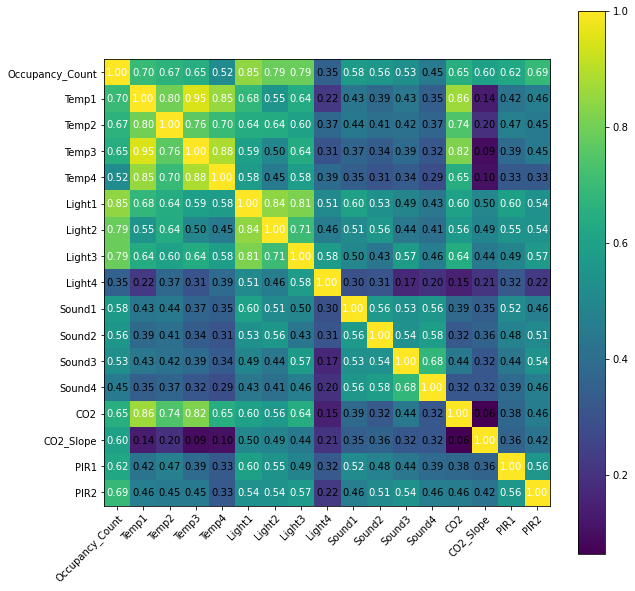

In [9]:
cm = df_train.corr().values
hm = heatmap(
    cm,
    row_names=df_train.columns,
    column_names=df_train.columns,
    figsize=(10, 10)
)

In [10]:
temp_avg = df_train[['Temp1','Temp2','Temp3','Temp4']].mean(axis = 1)
light_avg = df_train[['Light1', 'Light2', 'Light3', 'Light4']].mean(axis = 1)
sound_avg = df_train[['Sound1', 'Sound2', 'Sound3', 'Sound4']].mean(axis = 1)
df_train_avg = pd.DataFrame(df_train[['Occupancy_Count','CO2', 'CO2_Slope', 'PIR1', 'PIR2']])
df_train_avg.insert(1, 'sound_avg', sound_avg)
df_train_avg.insert(1, 'light_avg', light_avg)
df_train_avg.insert(1, 'temp_avg', temp_avg)
df_train_avg.head()

,Occupancy_Count,temp_avg,light_avg,sound_avg,CO2,CO2_Slope,PIR1,PIR2
0,1,25.9675,62.50,0.230,580.0,-0.034615,1.0,0.0
1,0,25.3475,0.00,0.065,365.0,0.000000,0.0,0.0
2,0,26.0775,25.75,0.060,435.0,-1.273077,0.0,0.0
3,0,25.0825,17.75,0.060,355.0,-0.065385,0.0,0.0
4,0,25.5975,33.25,0.105,355.0,0.000000,0.0,0.0


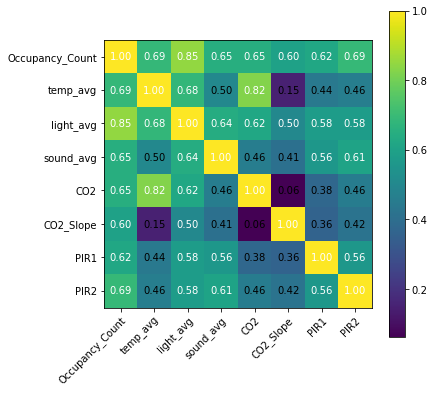

In [11]:
cm = df_train_avg.corr().values
hm = heatmap(
    cm,
    row_names=df_train_avg.columns,
    column_names=df_train_avg.columns,
    figsize=(6, 6)
)

`histogram of classes and features`

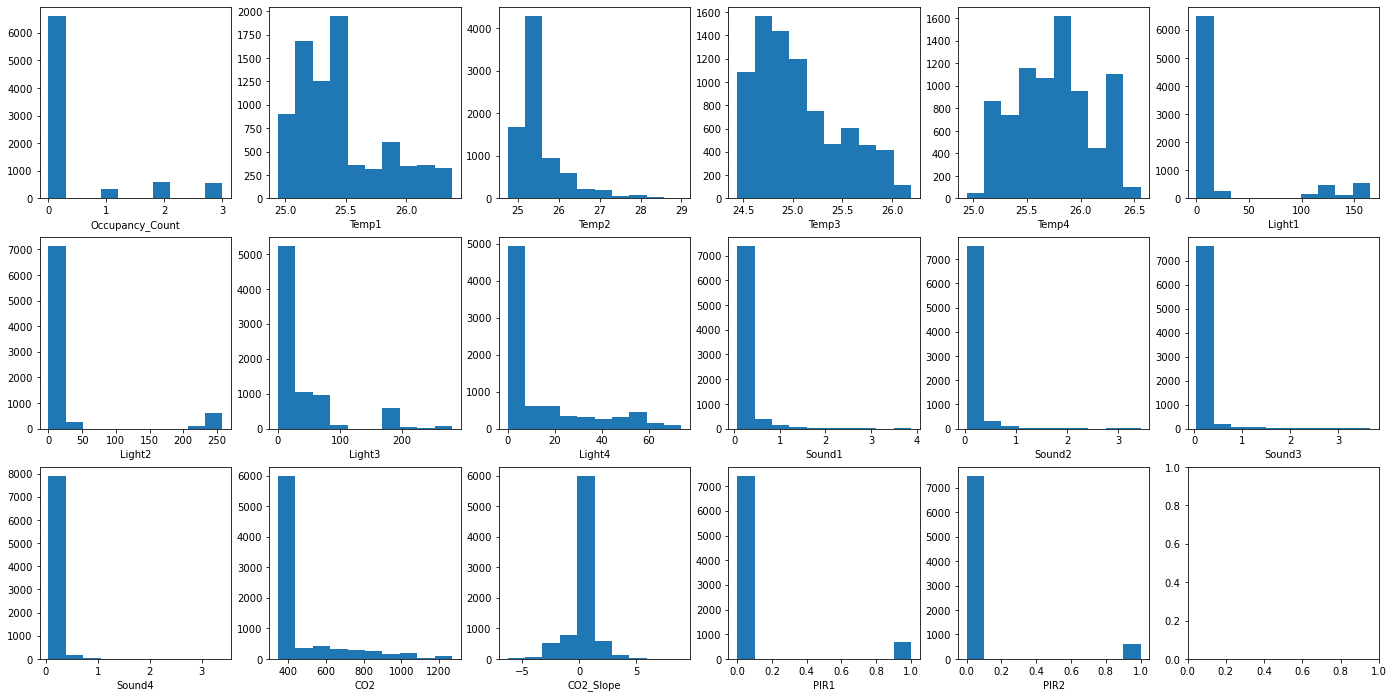

In [12]:
columns = ['Occupancy_Count', 'Temp1', 'Temp2', 'Temp3', 'Temp4',
             'Light1', 'Light2', 'Light3', 'Light4', 'Sound1',
             'Sound2', 'Sound3', 'Sound4', 'CO2', 'CO2_Slope',
             'PIR1', 'PIR2']
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24,12))
for idx, ax in enumerate(axes.flatten()):
    if idx >= len(columns):
        break
    # plot histogram
    ax.hist(df_train[columns[idx]])
    # set xlabel
    ax.set_xlabel(columns[idx])